<a href="https://colab.research.google.com/github/gouthamhusky/Gale-Shapley-Python/blob/main/Gale_Shapley_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [320]:
import random
from collections import deque 
import datetime

s = ['E2', 'F2', 'D3', 'F3', 'E1', 'F1', 'D1', 'D2']
random.shuffle(s)
print(s)

['D2', 'E1', 'E2', 'F3', 'F2', 'F1', 'D3', 'D1']


In [321]:
setA = {"A1", "A2", "A3", "B1", "B2", "C1", "C2", "C3"}
listA = ["A1", "A2", "A3", "B1", "B2", "C1", "C2", "C3"]
setB = {"D1", "D2", "D3", "E1", "E2", "F1", "F2", "F3"}
listB = ["D1", "D2", "D3", "E1", "E2", "F1", "F2", "F3"]

In [322]:
# create a ranking of the form 
# {TeamA': {'TeamB': 0, 'TeamB': 1, 'TeamC': 2}

def pref_to_rank(pref):
    return {
        a: {b: idx for idx, b in enumerate(a_pref)}
        for a, a_pref in pref.items()
    }

def gale_shapley(*, A, B, A_pref, B_pref):
    """Create a stable matching using the
    Gale-Shapley algorithm.
    
    A -- set[str].
    B -- set[str].
    A_pref -- dict[str, list[str]].
    B_pref -- dict[str, list[str]].

    Output: list of (a, b) pairs.
    """

    
    B_rank = pref_to_rank(B_pref)
    # Convert A's preference list to a form:
    # {'TeamA1': deque(['TeamE2', 'TeamF2', 'TeamD3', 'TeamF3', 'TeamE1', 'TeamF1', 'TeamD1', 'TeamD2'])
    # deque makes it easier to access most preferred due to FIFO
    ask_list = {a: deque(bs) for a, bs in A_pref.items()}
    pair = {}
    # remaining A's that have not yet proposed
    remaining_A = set(A)
    while len(remaining_A) > 0:
        # pop out an element from set A
        a = remaining_A.pop()
        # pop out the element's most preferred from its preferences
        b = ask_list[a].popleft()
        # if b is unengaged, pair them up
        if b not in pair:
            pair[b] = a
        
        else:
            # get the current partner of b
            a0 = pair[b]
            b_prefer_a0 = B_rank[b][a0] < B_rank[b][a]
            # if b prefers its current partner to a, then add a back to the remaining set
            if b_prefer_a0:
                remaining_A.add(a)
            else:
            # if b prefers a over its current partner, add a0 to remaining and pair (a, b)
                remaining_A.add(a0)
                pair[b] = a
    
    return [(a, b) for b, a in pair.items()]

In [323]:
print(random.sample(listA, len(listA)))

['B1', 'C1', 'A3', 'C2', 'C3', 'A2', 'B2', 'A1']


In [324]:
matching = gale_shapley(
      A = setA, 
      B = setB, 
      A_pref={
        "A1": ['E2', 'F2', 'D3', 'F3', 'E1', 'F1', 'D1', 'D2'],
        "A2": ['F2', 'D2', 'D1', 'E2', 'E1', 'D3', 'F1', 'F3'],
        "A3": ['F1', 'D2', 'D1', 'F3', 'D3', 'E1', 'E2', 'F2'],
        "B1": ['E2', 'D3', 'D2', 'F3', 'F1', 'E1', 'D1', 'F2'],
        "B2": ['F2', 'E1', 'D1', 'D3', 'F3', 'D2', 'F1', 'E2'],
        "C1": ['D2', 'D3', 'D1', 'E1', 'F1', 'F3', 'E2', 'F2'],
        "C1": ['D2', 'D1', 'F2', 'F1', 'D3', 'E2', 'E1', 'F3'],
        "C2": ['D3', 'F1', 'E2', 'F2', 'D1', 'E1', 'F3', 'D2'],
        "C3": ['F2', 'D3', 'D2', 'E2', 'E1', 'F3', 'F1', 'D1'],
    },
    B_pref={
        "D1": ['A3', 'C1', 'C3', 'A2', 'C2', 'B2', 'A1', 'B1'],
        "D2": ['C1', 'A3', 'C2', 'C3', 'B1', 'A1', 'B2', 'A2'],
        "D3": ['C2', 'A1', 'C1', 'A2', 'B1', 'A3', 'C3', 'B2'],
        "E1": ['A1', 'C2', 'A3', 'A2', 'B1', 'C1', 'B2', 'C3'],
        "E2": ['C2', 'B1', 'C1', 'A3', 'A1', 'B2', 'C3', 'A2'],
        "F1": ['A2', 'C1', 'B2', 'A1', 'B1', 'C3', 'C2', 'A3'],
        "F2": ['A2', 'C3', 'A1', 'A3', 'C2', 'C1', 'B1', 'B2'],
        "F3": ['A2', 'C2', 'B2', 'A1', 'A3', 'C1', 'B1', 'C3'],
    },
)

print(matching)

[('C1', 'D2'), ('C3', 'F1'), ('B1', 'E2'), ('A2', 'F2'), ('C2', 'D3'), ('B2', 'E1'), ('A1', 'F3'), ('A3', 'D1')]


In [325]:
def gale_shapley_bool(*, A, B, A_pref, B_pref):
    """Create a stable matching using the
    Gale-Shapley algorithm.
    
    A -- set[str].
    B -- set[str].
    A_pref -- dict[str, list[str]].
    B_pref -- dict[str, list[str]].

    Output: list of (a, b) pairs.
    """

    
    B_rank = pref_to_rank(B_pref)
    # Convert A's preference list to a form:
    # {'TeamA1': deque(['TeamE2', 'TeamF2', 'TeamD3', 'TeamF3', 'TeamE1', 'TeamF1', 'TeamD1', 'TeamD2'])
    # deque makes it easier to access most preferred due to FIFO
    ask_list = {a: deque(bs) for a, bs in A_pref.items()}
    pair = {}
    # remaining A's that have not yet proposed
    remaining_A = set(A)
    while len(remaining_A) > 0:
        # pop out an element from set A
        a = remaining_A.pop()
        # pop out the element's most preferred from its preferences
        b = ask_list[a].popleft()
        # if b is unengaged, pair them up
        if b not in pair:
            pair[b] = a
        
        else:
            # get the current partner of b
            a0 = pair[b]
            b_prefer_a0 = B_rank[b][a0] < B_rank[b][a]
            # if b prefers its current partner to a, then add a back to the remaining set
            if b_prefer_a0:
                remaining_A.add(a)
            else:
            # if b prefers a over its current partner, add a0 to remaining and pair (a, b)
                remaining_A.add(a0)
                pair[b] = a
    return len(pair) == 8

In [326]:
from collections import deque
from tqdm import tqdm


stableMatches = 0
for i in range(1000):
  matching = gale_shapley_bool(
      A = setA, 
      B = setB, 
      A_pref={
        "A1": random.sample(listB, len(listB)),
        "A2": random.sample(listB, len(listB)),
        "A3": random.sample(listB, len(listB)),
        "B1": random.sample(listB, len(listB)),
        "B2": random.sample(listB, len(listB)),
        "C1": random.sample(listB, len(listB)),
        "C2": random.sample(listB, len(listB)),
        "C3": random.sample(listB, len(listB)),
    },
    B_pref={
        "D1": random.sample(listA, len(listA)),
        "D2": random.sample(listA, len(listA)),
        "D3": random.sample(listA, len(listA)),
        "E1": random.sample(listA, len(listA)),
        "E2": random.sample(listA, len(listA)),
        "F1": random.sample(listA, len(listA)),
        "F2": random.sample(listA, len(listA)),
        "F3": random.sample(listA, len(listA)),
    },
      )
  if matching == True:
    stableMatches +=1
  
print("% of stable matches: ", stableMatches/1000 * 100)


% of stable matches:  100.0


In [327]:
# Assume that 8 teams lost 

AStage2Set = {"A1", "A3", "B1", "C3"}
BStage2Set = {"D1", "D2", "F1", "F2"}

AStage2List = ["A1", "A3", "B1", "C3"]
BStage2List = ["D1", "D2", "F1", "F2"]


gale_shapley(
    A = AStage2Set,
    B = BStage2Set,
    A_pref={
        "A1": random.sample(BStage2List, len(BStage2List)),
        "A3": random.sample(BStage2List, len(BStage2List)),
        "B1": random.sample(BStage2List, len(BStage2List)),
        "C3": random.sample(BStage2List, len(BStage2List)),
    },
    B_pref={
        "D1": random.sample(AStage2List, len(AStage2List)),
        "D2": random.sample(AStage2List, len(AStage2List)),
        "F1": random.sample(AStage2List, len(AStage2List)),
        "F2": random.sample(AStage2List, len(AStage2List)),
    },
)

[('C3', 'D2'), ('A3', 'F1'), ('A1', 'D1'), ('B1', 'F2')]

In [328]:
# Assume that 4 teams lost 

AStage3Set = {"A1", "A3"}
BStage3Set = {"D1", "F2"}

AStage3List = ["A1", "A3"]
BStage3List = ["D1", "F2"]


gale_shapley(
    A = AStage3Set,
    B = BStage3Set,
    A_pref={
        "A1": random.sample(BStage3List, len(BStage3List)),
        "A3": random.sample(BStage3List, len(BStage3List)),
    },
    B_pref={
        "D1": random.sample(AStage3List, len(AStage3List)),
        "F2": random.sample(AStage3List, len(AStage3List)),
    },
)

[('A1', 'F2'), ('A3', 'D1')]

In [329]:
#Assume that two more teams lost

AStage4Set = {"A1"}
BStage4Set = {"F2"}

AStage4List = ["A1"]
BStage4List = ["F2"]


gale_shapley(
    A = AStage4Set,
    B = BStage4Set,
    A_pref={
        "A1": BStage4List,
    },
    B_pref={
        "F2": AStage4List,
    },
)

[('A1', 'F2')]

In [330]:
A_pref={
        "A1": ['E2', 'F2', 'D3', 'F3', 'E1', 'F1', 'D1', 'D2'],
        "A2": ['F2', 'D2', 'D1', 'E2', 'E1', 'D3', 'F1', 'F3'],
        "A3": ['F1', 'D2', 'D1', 'F3', 'D3', 'E1', 'E2', 'F2'],
        "B1": ['E2', 'D3', 'D2', 'F3', 'F1', 'E1', 'D1', 'F2'],
        "B2": ['F2', 'E1', 'D1', 'D3', 'F3', 'D2', 'F1', 'E2'],
        "C1": ['D2', 'D3', 'D1', 'E1', 'F1', 'F3', 'E2', 'F2'],
        "C1": ['D2', 'D1', 'F2', 'F1', 'D3', 'E2', 'E1', 'F3'],
        "C2": ['D3', 'F1', 'E2', 'F2', 'D1', 'E1', 'F3', 'D2'],
        "C3": ['F2', 'D3', 'D2', 'E2', 'E1', 'F3', 'F1', 'D1'],
}

B_pref={
        "D1": ['A3', 'C1', 'C3', 'A2', 'C2', 'B2', 'A1', 'B1'],
        "D2": ['C1', 'A3', 'C2', 'C3', 'B1', 'A1', 'B2', 'A2'],
        "D3": ['C2', 'A1', 'C1', 'A2', 'B1', 'A3', 'C3', 'B2'],
        "E1": ['A1', 'C2', 'A3', 'A2', 'B1', 'C1', 'B2', 'C3'],
        "E2": ['C2', 'B1', 'C1', 'A3', 'A1', 'B2', 'C3', 'A2'],
        "F1": ['A2', 'C1', 'B2', 'A1', 'B1', 'C3', 'C2', 'A3'],
        "F2": ['A2', 'C3', 'A1', 'A3', 'C2', 'C1', 'B1', 'B2'],
        "F3": ['A2', 'C2', 'B2', 'A1', 'A3', 'C1', 'B1', 'C3'],
}

In [331]:
execution_times = list()

In [332]:
st = datetime.datetime.now()
stm = st.microsecond / 1000 

gale_shapley(
      A = setA, 
      B = setB, 
      A_pref= A_pref,
    B_pref=B_pref,
)

et = datetime.datetime.now()
etm = et.microsecond / 1000
execution_times.append(etm - stm)

In [333]:
def cross(A, B):
    """The set of ways of concatenating one item from collection A with one from B."""
    return {a + b 
            for a in A for b in B}

In [334]:
setA = cross('ABCD', '1234')
setB = cross('abcd', '1234')

In [335]:
a_pref={
        "A1": random.sample(setB, len(setB)),
        "A2": random.sample(setB, len(setB)),
        "A3": random.sample(setB, len(setB)),
        "A4": random.sample(setB, len(setB)),
        "B1": random.sample(setB, len(setB)),
        "B2": random.sample(setB, len(setB)),
        "B3": random.sample(setB, len(setB)),
        "B4": random.sample(setB, len(setB)),
        "C1": random.sample(setB, len(setB)),
        "C2": random.sample(setB, len(setB)),
        "C3": random.sample(setB, len(setB)),
        "C4": random.sample(setB, len(setB)),
        "D1": random.sample(setB, len(setB)),
        "D2": random.sample(setB, len(setB)),
        "D3": random.sample(setB, len(setB)),
        "D4": random.sample(setB, len(setB)),

    }

b_pref={
        "a1": random.sample(setA, len(setA)),
        "a2": random.sample(setA, len(setA)),
        "a3": random.sample(setA, len(setA)),
        "a4": random.sample(setA, len(setA)),
        "b1": random.sample(setA, len(setA)),
        "b2": random.sample(setA, len(setA)),
        "b3": random.sample(setA, len(setA)),
        "b4": random.sample(setA, len(setA)),
        "c1": random.sample(setA, len(setA)),
        "c2": random.sample(setA, len(setA)),
        "c3": random.sample(setA, len(setA)),
        "c4": random.sample(setA, len(setA)),
        "d1": random.sample(setA, len(setA)),
        "d2": random.sample(setA, len(setA)),
        "d3": random.sample(setA, len(setA)),
        "d4": random.sample(setA, len(setA)),
    }

In [336]:
st = datetime.datetime.now()
stm = st.microsecond / 1000 
gale_shapley(
    A = setA,
    B = setB,
    A_pref = a_pref,
    B_pref = b_pref
)
et = datetime.datetime.now()
etm = et.microsecond / 1000

execution_times.append(etm - stm)

In [337]:
setA = cross('ABCDEFGH', '1234')
setB = cross('abcdefgh', '1234')

print(setA)
print(setB)

{'D4', 'H4', 'C4', 'B2', 'F2', 'D2', 'E1', 'A1', 'B4', 'F3', 'H1', 'C3', 'E2', 'H3', 'D3', 'A2', 'B1', 'E4', 'C1', 'A3', 'D1', 'G3', 'C2', 'A4', 'E3', 'G2', 'H2', 'G1', 'F4', 'G4', 'B3', 'F1'}
{'g2', 'f2', 'd4', 'a1', 'a2', 'e1', 'c1', 'g3', 'a4', 'h2', 'h3', 'h1', 'f3', 'h4', 'b2', 'b1', 'e2', 'g1', 'd2', 'g4', 'c2', 'f1', 'c4', 'f4', 'e4', 'b3', 'd1', 'a3', 'd3', 'c3', 'b4', 'e3'}


In [338]:

a_pref = {
        "A1": random.sample(setB, len(setB)),
        "A2": random.sample(setB, len(setB)),
        "A3": random.sample(setB, len(setB)),
        "A4": random.sample(setB, len(setB)),
        "B1": random.sample(setB, len(setB)),
        "B2": random.sample(setB, len(setB)),
        "B3": random.sample(setB, len(setB)),
        "B4": random.sample(setB, len(setB)),
        "B1": random.sample(setB, len(setB)),
        "B2": random.sample(setB, len(setB)),
        "B3": random.sample(setB, len(setB)),
        "B4": random.sample(setB, len(setB)),
        "C1": random.sample(setB, len(setB)),
        "C2": random.sample(setB, len(setB)),
        "C3": random.sample(setB, len(setB)),
        "C4": random.sample(setB, len(setB)),
        "D1": random.sample(setB, len(setB)),
        "D2": random.sample(setB, len(setB)),
        "D3": random.sample(setB, len(setB)),
        "D4": random.sample(setB, len(setB)),
        "E1": random.sample(setB, len(setB)),
        "E2": random.sample(setB, len(setB)),
        "E3": random.sample(setB, len(setB)),
        "E4": random.sample(setB, len(setB)),
        "F1": random.sample(setB, len(setB)),
        "F2": random.sample(setB, len(setB)),
        "F3": random.sample(setB, len(setB)),
        "F4": random.sample(setB, len(setB)),
        "G1": random.sample(setB, len(setB)),
        "G2": random.sample(setB, len(setB)),
        "G3": random.sample(setB, len(setB)),
        "G4": random.sample(setB, len(setB)),
        "H1": random.sample(setB, len(setB)),
        "H2": random.sample(setB, len(setB)),
        "H3": random.sample(setB, len(setB)),
        "H4": random.sample(setB, len(setB)),

    }

b_pref = {
        "a1": random.sample(setA, len(setA)),
        "a2": random.sample(setA, len(setA)),
        "a3": random.sample(setA, len(setA)),
        "a4": random.sample(setA, len(setA)),
        "b1": random.sample(setA, len(setA)),
        "b2": random.sample(setA, len(setA)),
        "b3": random.sample(setA, len(setA)),
        "b4": random.sample(setA, len(setA)),
        "c1": random.sample(setA, len(setA)),
        "c2": random.sample(setA, len(setA)),
        "c3": random.sample(setA, len(setA)),
        "c4": random.sample(setA, len(setA)),
        "d1": random.sample(setA, len(setA)),
        "d2": random.sample(setA, len(setA)),
        "d3": random.sample(setA, len(setA)),
        "d4": random.sample(setA, len(setA)),
        "e1": random.sample(setA, len(setA)),
        "e2": random.sample(setA, len(setA)),
        "e3": random.sample(setA, len(setA)),
        "e4": random.sample(setA, len(setA)),
        "f1": random.sample(setA, len(setA)),
        "f2": random.sample(setA, len(setA)),
        "f3": random.sample(setA, len(setA)),
        "f4": random.sample(setA, len(setA)),
        "g1": random.sample(setA, len(setA)),
        "g2": random.sample(setA, len(setA)),
        "g3": random.sample(setA, len(setA)),
        "g4": random.sample(setA, len(setA)),
        "h1": random.sample(setA, len(setA)),
        "h2": random.sample(setA, len(setA)),
        "h3": random.sample(setA, len(setA)),
        "h4": random.sample(setA, len(setA)),
    }

In [339]:
st = datetime.datetime.now()
stm = st.microsecond / 1000 
gale_shapley(
    A = setA,
    B = setB,
    A_pref = a_pref,
    B_pref = b_pref
)
et = datetime.datetime.now()
etm = et.microsecond / 1000

execution_times.append(etm - stm)

In [340]:
setA = cross('ABCDEFGH', '12345678')
setB = cross('abcdefgh', '12345678')

print(setA)
print(setB)

{'D4', 'H4', 'C4', 'B2', 'F2', 'B3', 'D2', 'A5', 'D7', 'A7', 'F6', 'E8', 'E1', 'E7', 'A1', 'H5', 'B4', 'F3', 'E6', 'H6', 'F7', 'F8', 'H7', 'H8', 'H1', 'C3', 'D5', 'E2', 'H3', 'D3', 'A2', 'B1', 'G6', 'E4', 'C1', 'D6', 'A3', 'B7', 'D1', 'C5', 'G3', 'C2', 'C8', 'G5', 'B5', 'A6', 'B8', 'A4', 'C7', 'G8', 'A8', 'E3', 'D8', 'F5', 'G2', 'H2', 'G7', 'G1', 'E5', 'F4', 'G4', 'C6', 'B6', 'F1'}
{'a5', 'a8', 'g2', 'a7', 'e5', 'c1', 'a1', 'a2', 'd4', 'e1', 'f2', 'a4', 'g3', 'g5', 'h2', 'h3', 'h1', 'f8', 'f7', 'g8', 'e6', 'f3', 'd6', 'h4', 'a6', 'h8', 'b2', 'b1', 'e2', 'c5', 'g1', 'c7', 'b6', 'd2', 'c8', 'b5', 'h6', 'b7', 'c6', 'f6', 'g4', 'd7', 'c2', 'f1', 'g7', 'b8', 'c4', 'e8', 'h5', 'f4', 'd5', 'h7', 'e4', 'b3', 'd1', 'a3', 'd3', 'e7', 'c3', 'f5', 'b4', 'd8', 'g6', 'e3'}


In [341]:

a_pref = {
        "A1": random.sample(setB, len(setB)),
        "A2": random.sample(setB, len(setB)),
        "A3": random.sample(setB, len(setB)),
        "A4": random.sample(setB, len(setB)),
        "A5": random.sample(setB, len(setB)),
        "A6": random.sample(setB, len(setB)),
        "A7": random.sample(setB, len(setB)),
        "A8": random.sample(setB, len(setB)),
        "B1": random.sample(setB, len(setB)),
        "B2": random.sample(setB, len(setB)),
        "B3": random.sample(setB, len(setB)),
        "B4": random.sample(setB, len(setB)),
        "B5": random.sample(setB, len(setB)),
        "B6": random.sample(setB, len(setB)),
        "B7": random.sample(setB, len(setB)),
        "B8": random.sample(setB, len(setB)),
        "C1": random.sample(setB, len(setB)),
        "C2": random.sample(setB, len(setB)),
        "C3": random.sample(setB, len(setB)),
        "C4": random.sample(setB, len(setB)),
        "C5": random.sample(setB, len(setB)),
        "C6": random.sample(setB, len(setB)),
        "C7": random.sample(setB, len(setB)),
        "C8": random.sample(setB, len(setB)),
        "D1": random.sample(setB, len(setB)),
        "D2": random.sample(setB, len(setB)),
        "D3": random.sample(setB, len(setB)),
        "D4": random.sample(setB, len(setB)),
        "D5": random.sample(setB, len(setB)),
        "D6": random.sample(setB, len(setB)),
        "D7": random.sample(setB, len(setB)),
        "D8": random.sample(setB, len(setB)),
        "E1": random.sample(setB, len(setB)),
        "E2": random.sample(setB, len(setB)),
        "E3": random.sample(setB, len(setB)),
        "E4": random.sample(setB, len(setB)),
        "E5": random.sample(setB, len(setB)),
        "E6": random.sample(setB, len(setB)),
        "E7": random.sample(setB, len(setB)),
        "E8": random.sample(setB, len(setB)),
        "F1": random.sample(setB, len(setB)),
        "F2": random.sample(setB, len(setB)),
        "F3": random.sample(setB, len(setB)),
        "F4": random.sample(setB, len(setB)),
        "F5": random.sample(setB, len(setB)),
        "F6": random.sample(setB, len(setB)),
        "F7": random.sample(setB, len(setB)),
        "F8": random.sample(setB, len(setB)),
        "G1": random.sample(setB, len(setB)),
        "G2": random.sample(setB, len(setB)),
        "G3": random.sample(setB, len(setB)),
        "G4": random.sample(setB, len(setB)),
        "G5": random.sample(setB, len(setB)),
        "G6": random.sample(setB, len(setB)),
        "G7": random.sample(setB, len(setB)),
        "G8": random.sample(setB, len(setB)),
        "H1": random.sample(setB, len(setB)),
        "H2": random.sample(setB, len(setB)),
        "H3": random.sample(setB, len(setB)),
        "H4": random.sample(setB, len(setB)),
        "H5": random.sample(setB, len(setB)),
        "H6": random.sample(setB, len(setB)),
        "H7": random.sample(setB, len(setB)),
        "H8": random.sample(setB, len(setB)),
    }

b_pref = {
        "a1": random.sample(setA, len(setA)),
        "a2": random.sample(setA, len(setA)),
        "a3": random.sample(setA, len(setA)),
        "a4": random.sample(setA, len(setA)),
        "a5": random.sample(setA, len(setA)),
        "a6": random.sample(setA, len(setA)),
        "a7": random.sample(setA, len(setA)),
        "a8": random.sample(setA, len(setA)),
        "b1": random.sample(setA, len(setA)),
        "b2": random.sample(setA, len(setA)),
        "b3": random.sample(setA, len(setA)),
        "b4": random.sample(setA, len(setA)),
        "b5": random.sample(setA, len(setA)),
        "b6": random.sample(setA, len(setA)),
        "b7": random.sample(setA, len(setA)),
        "b8": random.sample(setA, len(setA)),
        "c1": random.sample(setA, len(setA)),
        "c2": random.sample(setA, len(setA)),
        "c3": random.sample(setA, len(setA)),
        "c4": random.sample(setA, len(setA)),
        "c5": random.sample(setA, len(setA)),
        "c6": random.sample(setA, len(setA)),
        "c7": random.sample(setA, len(setA)),
        "c8": random.sample(setA, len(setA)),
        "d1": random.sample(setA, len(setA)),
        "d2": random.sample(setA, len(setA)),
        "d3": random.sample(setA, len(setA)),
        "d4": random.sample(setA, len(setA)),
        "d5": random.sample(setA, len(setA)),
        "d6": random.sample(setA, len(setA)),
        "d7": random.sample(setA, len(setA)),
        "d8": random.sample(setA, len(setA)),
        "e1": random.sample(setA, len(setA)),
        "e2": random.sample(setA, len(setA)),
        "e3": random.sample(setA, len(setA)),
        "e4": random.sample(setA, len(setA)),
        "e5": random.sample(setA, len(setA)),
        "e6": random.sample(setA, len(setA)),
        "e7": random.sample(setA, len(setA)),
        "e8": random.sample(setA, len(setA)),
        "f1": random.sample(setA, len(setA)),
        "f2": random.sample(setA, len(setA)),
        "f3": random.sample(setA, len(setA)),
        "f4": random.sample(setA, len(setA)),
        "f5": random.sample(setA, len(setA)),
        "f6": random.sample(setA, len(setA)),
        "f7": random.sample(setA, len(setA)),
        "f8": random.sample(setA, len(setA)),
        "g1": random.sample(setA, len(setA)),
        "g2": random.sample(setA, len(setA)),
        "g3": random.sample(setA, len(setA)),
        "g4": random.sample(setA, len(setA)),
        "g5": random.sample(setA, len(setA)),
        "g6": random.sample(setA, len(setA)),
        "g7": random.sample(setA, len(setA)),
        "g8": random.sample(setA, len(setA)),
        "h1": random.sample(setA, len(setA)),
        "h2": random.sample(setA, len(setA)),
        "h3": random.sample(setA, len(setA)),
        "h4": random.sample(setA, len(setA)),
        "h5": random.sample(setA, len(setA)),
        "h6": random.sample(setA, len(setA)),
        "h7": random.sample(setA, len(setA)),
        "h8": random.sample(setA, len(setA)),
}

In [342]:
st = datetime.datetime.now()
stm = st.microsecond / 1000 
gale_shapley(
    A = setA,
    B = setB,
    A_pref = a_pref,
    B_pref = b_pref
)
et = datetime.datetime.now()
etm = et.microsecond / 1000

execution_times.append(etm - stm)

In [343]:
setA = cross('ABCDEFGHIJKLMNOP', '12345678')
setB = cross('abcdefghijklmnop', '12345678')

print(setA)
print(setB)

{'K7', 'H4', 'C4', 'B2', 'L1', 'P2', 'D7', 'F6', 'J6', 'E8', 'A1', 'N1', 'F3', 'E6', 'I7', 'D3', 'A2', 'E4', 'D6', 'A3', 'J5', 'J3', 'M7', 'M4', 'M8', 'K8', 'O4', 'G2', 'J8', 'K3', 'E5', 'G4', 'K2', 'I2', 'F1', 'D2', 'O2', 'E7', 'I8', 'M5', 'B4', 'H8', 'H1', 'I4', 'L2', 'I6', 'O1', 'H3', 'L7', 'M2', 'P1', 'C5', 'O3', 'P6', 'A6', 'L3', 'G8', 'L8', 'E3', 'D8', 'F5', 'J7', 'K6', 'G1', 'G6', 'F4', 'C6', 'P8', 'O7', 'D4', 'P5', 'P7', 'A5', 'J1', 'M1', 'O5', 'H5', 'I5', 'H7', 'F7', 'L6', 'C3', 'D5', 'E2', 'B1', 'N8', 'C1', 'O8', 'G3', 'M3', 'C2', 'G5', 'J4', 'K4', 'C7', 'P3', 'H2', 'K5', 'B3', 'B6', 'F2', 'N7', 'N5', 'A7', 'I1', 'E1', 'H6', 'J2', 'N6', 'N3', 'F8', 'L5', 'O6', 'B7', 'D1', 'M6', 'N2', 'C8', 'N4', 'P4', 'B5', 'I3', 'B8', 'A4', 'A8', 'G7', 'K1', 'L4'}
{'k8', 'a5', 'l3', 'g2', 'g3', 'h3', 'l4', 'o1', 'i4', 'd2', 'i3', 'm5', 'n8', 'k7', 'j2', 'n3', 'e8', 'f4', 'l7', 'd5', 'b3', 'e7', 'c3', 'o6', 'p7', 'g4', 'j8', 'a8', 'd4', 'k1', 'h1', 'f8', 'o4', 'k5', 'f3', 'h4', 'n5', 'j7', 'j

In [344]:

a_pref = {
        "A1": random.sample(setB, len(setB)),
        "A2": random.sample(setB, len(setB)),
        "A3": random.sample(setB, len(setB)),
        "A4": random.sample(setB, len(setB)),
        "A5": random.sample(setB, len(setB)),
        "A6": random.sample(setB, len(setB)),
        "A7": random.sample(setB, len(setB)),
        "A8": random.sample(setB, len(setB)),
        "B1": random.sample(setB, len(setB)),
        "B2": random.sample(setB, len(setB)),
        "B3": random.sample(setB, len(setB)),
        "B4": random.sample(setB, len(setB)),
        "B5": random.sample(setB, len(setB)),
        "B6": random.sample(setB, len(setB)),
        "B7": random.sample(setB, len(setB)),
        "B8": random.sample(setB, len(setB)),
        "C1": random.sample(setB, len(setB)),
        "C2": random.sample(setB, len(setB)),
        "C3": random.sample(setB, len(setB)),
        "C4": random.sample(setB, len(setB)),
        "C5": random.sample(setB, len(setB)),
        "C6": random.sample(setB, len(setB)),
        "C7": random.sample(setB, len(setB)),
        "C8": random.sample(setB, len(setB)),
        "D1": random.sample(setB, len(setB)),
        "D2": random.sample(setB, len(setB)),
        "D3": random.sample(setB, len(setB)),
        "D4": random.sample(setB, len(setB)),
        "D5": random.sample(setB, len(setB)),
        "D6": random.sample(setB, len(setB)),
        "D7": random.sample(setB, len(setB)),
        "D8": random.sample(setB, len(setB)),
        "E1": random.sample(setB, len(setB)),
        "E2": random.sample(setB, len(setB)),
        "E3": random.sample(setB, len(setB)),
        "E4": random.sample(setB, len(setB)),
        "E5": random.sample(setB, len(setB)),
        "E6": random.sample(setB, len(setB)),
        "E7": random.sample(setB, len(setB)),
        "E8": random.sample(setB, len(setB)),
        "F1": random.sample(setB, len(setB)),
        "F2": random.sample(setB, len(setB)),
        "F3": random.sample(setB, len(setB)),
        "F4": random.sample(setB, len(setB)),
        "F5": random.sample(setB, len(setB)),
        "F6": random.sample(setB, len(setB)),
        "F7": random.sample(setB, len(setB)),
        "F8": random.sample(setB, len(setB)),
        "G1": random.sample(setB, len(setB)),
        "G2": random.sample(setB, len(setB)),
        "G3": random.sample(setB, len(setB)),
        "G4": random.sample(setB, len(setB)),
        "G5": random.sample(setB, len(setB)),
        "G6": random.sample(setB, len(setB)),
        "G7": random.sample(setB, len(setB)),
        "G8": random.sample(setB, len(setB)),
        "H1": random.sample(setB, len(setB)),
        "H2": random.sample(setB, len(setB)),
        "H3": random.sample(setB, len(setB)),
        "H4": random.sample(setB, len(setB)),
        "H5": random.sample(setB, len(setB)),
        "H6": random.sample(setB, len(setB)),
        "H7": random.sample(setB, len(setB)),
        "H8": random.sample(setB, len(setB)),
        "I1": random.sample(setB, len(setB)),
        "I2": random.sample(setB, len(setB)),
        "I3": random.sample(setB, len(setB)),
        "I4": random.sample(setB, len(setB)),
        "I5": random.sample(setB, len(setB)),
        "I6": random.sample(setB, len(setB)),
        "I7": random.sample(setB, len(setB)),
        "I8": random.sample(setB, len(setB)),
        "J1": random.sample(setB, len(setB)),
        "J2": random.sample(setB, len(setB)),
        "J3": random.sample(setB, len(setB)),
        "J4": random.sample(setB, len(setB)),
        "J5": random.sample(setB, len(setB)),
        "J6": random.sample(setB, len(setB)),
        "J7": random.sample(setB, len(setB)),
        "J8": random.sample(setB, len(setB)),
        "K1": random.sample(setB, len(setB)),
        "K2": random.sample(setB, len(setB)),
        "K3": random.sample(setB, len(setB)),
        "K4": random.sample(setB, len(setB)),
        "K5": random.sample(setB, len(setB)),
        "K6": random.sample(setB, len(setB)),
        "K7": random.sample(setB, len(setB)),
        "K8": random.sample(setB, len(setB)),
        "L1": random.sample(setB, len(setB)),
        "L2": random.sample(setB, len(setB)),
        "L3": random.sample(setB, len(setB)),
        "L4": random.sample(setB, len(setB)),
        "L5": random.sample(setB, len(setB)),
        "L6": random.sample(setB, len(setB)),
        "L7": random.sample(setB, len(setB)),
        "L8": random.sample(setB, len(setB)),
        "M1": random.sample(setB, len(setB)),
        "M2": random.sample(setB, len(setB)),
        "M3": random.sample(setB, len(setB)),
        "M4": random.sample(setB, len(setB)),
        "M5": random.sample(setB, len(setB)),
        "M6": random.sample(setB, len(setB)),
        "M7": random.sample(setB, len(setB)),
        "M8": random.sample(setB, len(setB)),
        "N1": random.sample(setB, len(setB)),
        "N2": random.sample(setB, len(setB)),
        "N3": random.sample(setB, len(setB)),
        "N4": random.sample(setB, len(setB)),
        "N5": random.sample(setB, len(setB)),
        "N6": random.sample(setB, len(setB)),
        "N7": random.sample(setB, len(setB)),
        "N8": random.sample(setB, len(setB)),
        "O1": random.sample(setB, len(setB)),
        "O2": random.sample(setB, len(setB)),
        "O3": random.sample(setB, len(setB)),
        "O4": random.sample(setB, len(setB)),
        "O5": random.sample(setB, len(setB)),
        "O6": random.sample(setB, len(setB)),
        "O7": random.sample(setB, len(setB)),
        "O8": random.sample(setB, len(setB)),
        "P1": random.sample(setB, len(setB)),
        "P2": random.sample(setB, len(setB)),
        "P3": random.sample(setB, len(setB)),
        "P4": random.sample(setB, len(setB)),
        "P5": random.sample(setB, len(setB)),
        "P6": random.sample(setB, len(setB)),
        "P7": random.sample(setB, len(setB)),
        "P8": random.sample(setB, len(setB)),
      

    }

b_pref = {
        "a1": random.sample(setA, len(setA)),
        "a2": random.sample(setA, len(setA)),
        "a3": random.sample(setA, len(setA)),
        "a4": random.sample(setA, len(setA)),
        "a5": random.sample(setA, len(setA)),
        "a6": random.sample(setA, len(setA)),
        "a7": random.sample(setA, len(setA)),
        "a8": random.sample(setA, len(setA)),
        "b1": random.sample(setA, len(setA)),
        "b2": random.sample(setA, len(setA)),
        "b3": random.sample(setA, len(setA)),
        "b4": random.sample(setA, len(setA)),
        "b5": random.sample(setA, len(setA)),
        "b6": random.sample(setA, len(setA)),
        "b7": random.sample(setA, len(setA)),
        "b8": random.sample(setA, len(setA)),
        "c1": random.sample(setA, len(setA)),
        "c2": random.sample(setA, len(setA)),
        "c3": random.sample(setA, len(setA)),
        "c4": random.sample(setA, len(setA)),
        "c5": random.sample(setA, len(setA)),
        "c6": random.sample(setA, len(setA)),
        "c7": random.sample(setA, len(setA)),
        "c8": random.sample(setA, len(setA)),
        "d1": random.sample(setA, len(setA)),
        "d2": random.sample(setA, len(setA)),
        "d3": random.sample(setA, len(setA)),
        "d4": random.sample(setA, len(setA)),
        "d5": random.sample(setA, len(setA)),
        "d6": random.sample(setA, len(setA)),
        "d7": random.sample(setA, len(setA)),
        "d8": random.sample(setA, len(setA)),
        "e1": random.sample(setA, len(setA)),
        "e2": random.sample(setA, len(setA)),
        "e3": random.sample(setA, len(setA)),
        "e4": random.sample(setA, len(setA)),
        "e5": random.sample(setA, len(setA)),
        "e6": random.sample(setA, len(setA)),
        "e7": random.sample(setA, len(setA)),
        "e8": random.sample(setA, len(setA)),
        "f1": random.sample(setA, len(setA)),
        "f2": random.sample(setA, len(setA)),
        "f3": random.sample(setA, len(setA)),
        "f4": random.sample(setA, len(setA)),
        "f5": random.sample(setA, len(setA)),
        "f6": random.sample(setA, len(setA)),
        "f7": random.sample(setA, len(setA)),
        "f8": random.sample(setA, len(setA)),
        "g1": random.sample(setA, len(setA)),
        "g2": random.sample(setA, len(setA)),
        "g3": random.sample(setA, len(setA)),
        "g4": random.sample(setA, len(setA)),
        "g5": random.sample(setA, len(setA)),
        "g6": random.sample(setA, len(setA)),
        "g7": random.sample(setA, len(setA)),
        "g8": random.sample(setA, len(setA)),
        "h1": random.sample(setA, len(setA)),
        "h2": random.sample(setA, len(setA)),
        "h3": random.sample(setA, len(setA)),
        "h4": random.sample(setA, len(setA)),
        "h5": random.sample(setA, len(setA)),
        "h6": random.sample(setA, len(setA)),
        "h7": random.sample(setA, len(setA)),
        "h8": random.sample(setA, len(setA)),
        "i1": random.sample(setA, len(setA)),
        "i2": random.sample(setA, len(setA)),
        "i3": random.sample(setA, len(setA)),
        "i4": random.sample(setA, len(setA)),
        "i5": random.sample(setA, len(setA)),
        "i6": random.sample(setA, len(setA)),
        "i7": random.sample(setA, len(setA)),
        "i8": random.sample(setA, len(setA)),
        "j1": random.sample(setA, len(setA)),
        "j2": random.sample(setA, len(setA)),
        "j3": random.sample(setA, len(setA)),
        "j4": random.sample(setA, len(setA)),
        "j5": random.sample(setA, len(setA)),
        "j6": random.sample(setA, len(setA)),
        "j7": random.sample(setA, len(setA)),
        "j8": random.sample(setA, len(setA)),
        "k1": random.sample(setA, len(setA)),
        "k2": random.sample(setA, len(setA)),
        "k3": random.sample(setA, len(setA)),
        "k4": random.sample(setA, len(setA)),
        "k5": random.sample(setA, len(setA)),
        "k6": random.sample(setA, len(setA)),
        "k7": random.sample(setA, len(setA)),
        "k8": random.sample(setA, len(setA)),
        "l1": random.sample(setA, len(setA)),
        "l2": random.sample(setA, len(setA)),
        "l3": random.sample(setA, len(setA)),
        "l4": random.sample(setA, len(setA)),
        "l5": random.sample(setA, len(setA)),
        "l6": random.sample(setA, len(setA)),
        "l7": random.sample(setA, len(setA)),
        "l8": random.sample(setA, len(setA)),
        "m1": random.sample(setA, len(setA)),
        "m2": random.sample(setA, len(setA)),
        "m3": random.sample(setA, len(setA)),
        "m4": random.sample(setA, len(setA)),
        "m5": random.sample(setA, len(setA)),
        "m6": random.sample(setA, len(setA)),
        "m7": random.sample(setA, len(setA)),
        "m8": random.sample(setA, len(setA)),
        "n1": random.sample(setA, len(setA)),
        "n2": random.sample(setA, len(setA)),
        "n3": random.sample(setA, len(setA)),
        "n4": random.sample(setA, len(setA)),
        "n5": random.sample(setA, len(setA)),
        "n6": random.sample(setA, len(setA)),
        "n7": random.sample(setA, len(setA)),
        "n8": random.sample(setA, len(setA)),
        "o1": random.sample(setA, len(setA)),
        "o2": random.sample(setA, len(setA)),
        "o3": random.sample(setA, len(setA)),
        "o4": random.sample(setA, len(setA)),
        "o5": random.sample(setA, len(setA)),
        "o6": random.sample(setA, len(setA)),
        "o7": random.sample(setA, len(setA)),
        "o8": random.sample(setA, len(setA)),
        "p1": random.sample(setA, len(setA)),
        "p2": random.sample(setA, len(setA)),
        "p3": random.sample(setA, len(setA)),
        "p4": random.sample(setA, len(setA)),
        "p5": random.sample(setA, len(setA)),
        "p6": random.sample(setA, len(setA)),
        "p7": random.sample(setA, len(setA)),
        "p8": random.sample(setA, len(setA)),
    
}

In [345]:
st = datetime.datetime.now()
stm = st.microsecond / 1000 
gale_shapley(
    A = setA,
    B = setB,
    A_pref = a_pref,
    B_pref = b_pref
)
et = datetime.datetime.now()
etm = et.microsecond / 1000

execution_times.append(etm - stm)

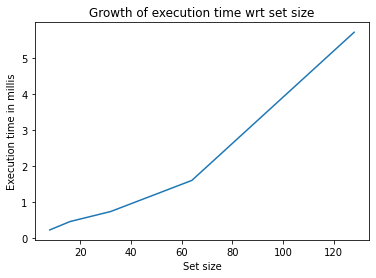

In [348]:
import matplotlib.pyplot as plt
import numpy as np

set_sizes = [8, 16, 32, 64, 128]

plt.xlabel("Set size")
plt.ylabel("Execution time in millis")
plt.title("Growth of execution time wrt set size")
plt.plot(set_sizes, execution_times)